<a href="https://colab.research.google.com/github/mxchauhan/Capstone/blob/master/Capstone_Project_Rating_of_Apps_at_Google_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [887]:
#Upload data and rename data column names

dataPath = ("https://raw.githubusercontent.com/mxchauhan/Capstone/master/googleplaystore.csv")

data = pd.read_csv(dataPath)

data.columns = ['app',
                'category',
                'rating',
                'reviews',
                'size',
                'installs',
                'type',
                'price',
                'contentRating',
                'genres',
                'updated',
                'version',
                'androidVersion']

data.head()

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [888]:
data.shape

(10841, 13)

## DATA CLEANING

In [889]:
data.isnull().values.ravel().sum()

1487

In [890]:
# we drop the NaNs
data.dropna(inplace=True)

#we check that the inplace transformation worked
data.isnull().values.ravel().sum()

0

In [891]:
data.shape

(9360, 13)

In [892]:
data.price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

In [893]:
data.contentRating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [894]:
data['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [895]:
data['updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [896]:
data.androidVersion.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [0]:
# Masks for taking mega and kilo values, used 
# to later convert size strings into numeric

mega = data['size'].str.contains('M')

kilo = data['size'].str.contains('k')

In [0]:
data['size'] = data['size'].str.strip('k')
data['size'] = data['size'].str.strip('M')
data['size'] = pd.to_numeric(data['size'], errors='coerce')

In [899]:
data['size'].loc[mega] = data['size'].loc[mega] * 1000000
data['size'].loc[kilo] = data['size'].loc[kilo] * 1000
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [900]:
print ((data.installs == 'Free').astype(int).sum())
print ((data.price == 'Everyone').astype(int).sum())

0
0


In [901]:
data[(data.installs == 'Free')]

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion


In [902]:
print ((data.contentRating == 'Unrated').astype(int).sum())

1


In [903]:
data.shape

(9360, 13)

**We drop or the row that has 'Free' as number of installs for the app and price equal to 'Everyone', as these are values that have spilled from other columns and are obvious data collection errors** 





In [904]:
data = data[~(data.installs == 'Free')]

data.shape

(9360, 13)

In [905]:
data.installs = data.installs.str.strip('+')
data.installs = data.installs.str.replace(',','')
data.installs.unique()


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [906]:
data.price = data.price.str.strip('$')
data.price = data.price.str.strip(' ')

data.price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [907]:
everyone = data['contentRating'] == 'Everyone'
everyone10 = data['contentRating'] == 'Everyone 10+'
teen = data['contentRating'] == 'Teen'
mature = data['contentRating'] == 'Mature 17+'
adult = data['contentRating'] == 'Adults only 18+'
unrated = data['contentRating'] == 'Unrated'

data['contentRating'].loc[everyone] = 0
data['contentRating'].loc[everyone10] = 10
data['contentRating'].loc[teen] = 13
data['contentRating'].loc[mature] = 17
data['contentRating'].loc[adult] = 18
data['contentRating'].loc[unrated] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [908]:
data.type.unique()

array(['Free', 'Paid'], dtype=object)

In [0]:
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')
data['installs'] = pd.to_numeric(data['installs'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [910]:
# we drop ratings equal to zero, as the app store doesn't allow a real user 
# rating to be equal to zero
data = data[data['rating']> 0]
data.head(5)

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,0,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,0,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,0,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,13,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,0,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [0]:
# we drop na again because some conversions may result in nan values
data.dropna(inplace=True)

##DATA EXPLORATION

In [0]:
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    data_filtered = data[(data > u-2*s) & (data < u+2*s)]
    return data_filtered

In [0]:
#data.rating = reject_outliers(data.rating)
#data.reviews = reject_outliers(data.reviews)
#data['size'] = reject_outliers(data['size'])
#data.installs = reject_outliers(data.installs)
#data.price = reject_outliers(data.price)

In [914]:
data.rating.describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

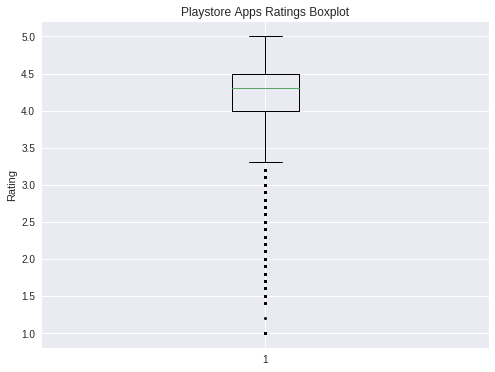

In [915]:
x = data.rating
plt.figure(figsize = (8, 6))
plt.ylabel('Rating')
plt.title('Playstore Apps Ratings Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

In [916]:
data.reviews.describe()

count    7.723000e+03
mean     2.948983e+05
std      1.863933e+06
min      1.000000e+00
25%      1.075000e+02
50%      2.332000e+03
75%      3.905300e+04
max      4.489389e+07
Name: reviews, dtype: float64

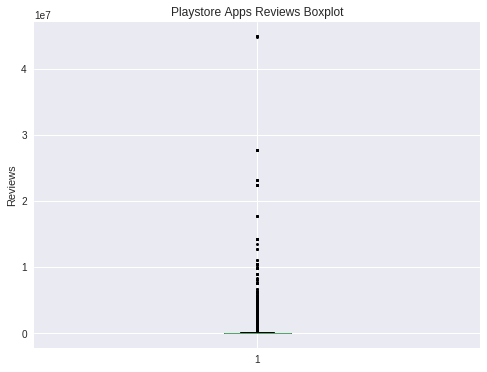

In [917]:
x = data.reviews
plt.figure(figsize = (8, 6))
plt.ylabel('Reviews')
plt.title('Playstore Apps Reviews Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

In [918]:
data.reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [919]:
data['rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

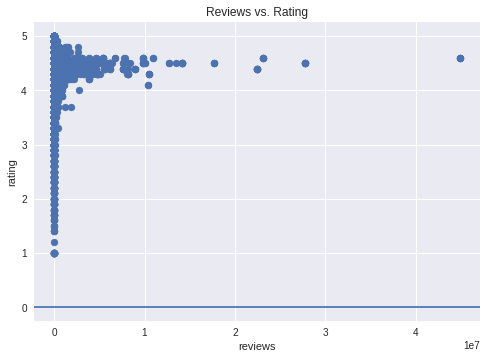

In [920]:
plt.scatter(data.reviews, data.rating)
plt.xlabel('reviews')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Reviews vs. Rating')
plt.show()


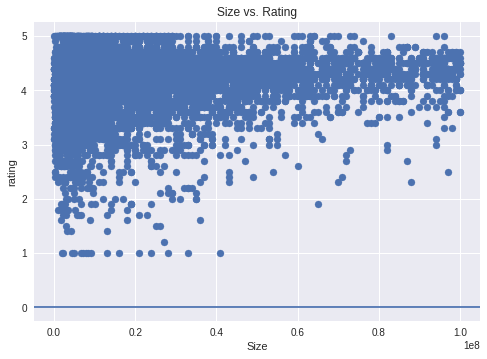

In [921]:
plt.scatter(data['size'], data.rating)
plt.xlabel('Size')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Size vs. Rating')
plt.show()

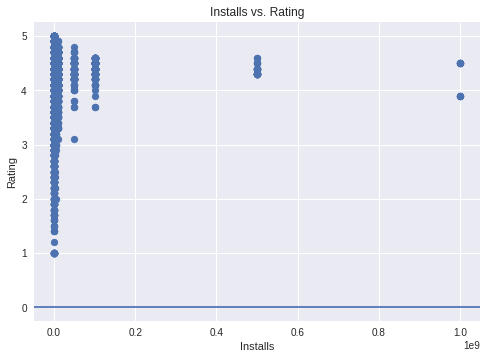

In [922]:
plt.scatter(data.installs, data.rating)
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Installs vs. Rating')
plt.show()

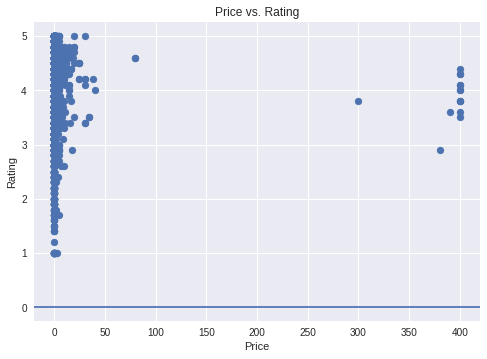

In [923]:
plt.scatter(data.price, data.rating)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Price vs. Rating')
plt.show()

In [0]:
data.dropna(inplace=True)

##FEATURES

In [0]:
features = data[['rating', 'reviews', 'size','installs', 'price', 'contentRating']]

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaledTrainData = scaler.fit(features)

scaledTrainData = scaler.transform(features)

features = pd.DataFrame(scaledTrainData, columns=['rating', 'reviews', 'size','installs', 'price', 'contentRating'])

In [0]:
# we add a binary feature that evaluates to true
# when rating is above the median (useful for logistic regression)
features['positiveRating'] = np.where(data['rating']>=4.2, 1, 0)

In [928]:
features.head()

,rating,reviews,size,installs,price,contentRating,positiveRating
0,0.775,0.000004,0.189931,0.00001,0.0,0.000000,0
1,0.725,0.000022,0.139927,0.00050,0.0,0.000000,0
2,0.925,0.001949,0.086922,0.00500,0.0,0.000000,1
3,0.875,0.004803,0.249936,0.05000,0.0,0.722222,1
4,0.825,0.000022,0.027917,0.00010,0.0,0.000000,1


##DATA MODELING

### LOGISTIC REGRESSION

In [0]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [930]:
lr = LogisticRegression(C=1.0)
X = features[['reviews', 'size','installs', 'price', 'contentRating']]
Y = features.positiveRating

X.fillna(value=0, inplace= True)

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

#TODO: clean this up, we're not doing prediction of admissions
print('\n Confusion matrix')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

Coefficients
[[ 5.28508395  0.79209278  2.37698813 -1.14011351 -0.1599203 ]]
[0.33678776]

 Confusion matrix
positiveRating     0     1
row_0                     
0                 12     3
1               2861  4847

 Percentage accuracy
0.6291596529845915


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


### RIDGE REGRESSION

In [931]:
from sklearn import linear_model

ridgeregr = linear_model.Ridge(alpha=.05, fit_intercept=True) 
ridgeregr.fit(X, Y)
print(ridgeregr.score(X, Y))
origparams = ridgeregr.coef_[0]
print(origparams)

0.019448880234413157
0.8860560882258263


In [932]:
print(ridgeregr.score(X, Y))

0.019448880234413157


We're getting a negative $R^2$ value, [which implies that the prediction is doing a worse job than using the mean value as a prediction](http://www.fairlynerdy.com/what-is-r-squared/). The question now is why do we obtain this.  



### LASSO REGRESSION

In [0]:
from sklearn.metrics import r2_score

lass = linear_model.Lasso(alpha=.05)
lassfit = lass.fit(X, Y)
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
#print('R² for the model with few features:')

In [934]:
from sklearn.metrics import r2_score

y_pred = lassfit.predict(X)
print(r2_score(Y, y_pred))  


0.0


In [935]:
print(r2_score(Y, y_pred))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

0.0

Parameter estimates for the model with few features:
[ 0.         0.         0.        -0.        -0.         0.6279943]


### RANDOM FOREST

In [936]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = features[['reviews', 'size','installs', 'price', 'contentRating']]
Y = features['positiveRating']
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.62354463, 0.6545925 , 0.61190168, 0.62305699, 0.63212435,
       0.61010363, 0.62435233, 0.60233161, 0.64507772, 0.60621762])

### LINEAR REGRESSION

In [937]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
Y2 = features['rating'].values.reshape(-1, 1)
X2 = features[['reviews', 'size','installs', 'price', 'contentRating']]

# impute 0 to nans
X2.fillna(value=0, inplace= True)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.nan_to_num.html
np.nan_to_num(Y2, copy=False)


regr.fit(X2,Y2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[ 0.20154886  0.03947125  0.0080571  -0.05908263 -0.00021794]]

Intercept: 
 [0.78322699]

R-squared:
0.011142273889671372


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


## Ideas for Analysis

+ We can do regression analysis of ratings using the following models:
  * K-nn
  * Random forest
  * Ridge regression
  * Lasso regression
  
  ***"Make sure to think about explanatory versus predictive power and experiment with both.""***

+ We can write a binary classifier that will predict whether a particular app will have a rating above or below the population's median.  

  * Logistic regression
  * Random forest 
  * K-nn 

+ We are gonna compare the performance of the different classifiers and finetune their performance using GridSearchCV (which is search for optimal hyperparameters in a cross validated grid search) and StochasticSearchCV

### References
+ http://scikit-learn.org/stable/modules/grid_search.html
+ http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
+ http://scikit-learn.org/0.15/modules/generated/sklearn.grid_search.GridSearchCV.html

### Homework

+ Explain the differences between GridSearchCV and RandomizedSearchCV:
  * Which of these methods is more exhaustive?
  - GridSearch CV, considers all possible parameter combinations
  
  * Which of these methods is faster?
  - RandomizedSearchCV, fixed number of parameter settings are sampled, does not consider all combinations
  
  * How do we make the results of RandomizedSearchCV reproducible?
  - random_state
  
+ Learn a bit of Google Slides (it's easy!):
  + https://www.google.com/slides/about/
  
## Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

+ A specified research question your model addresses
+ How you chose your model specification and what alternatives you compared it to
+ The practical uses of your model for an audience of interest
+ Any weak points or shortcomings of your model